## Problem 3

[(37.50000000000004, 0.0), (26.196761034847764, -395.0), (25.669449118692594, -134.0)]


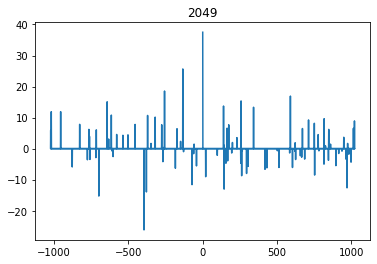

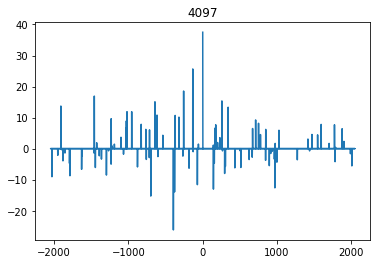

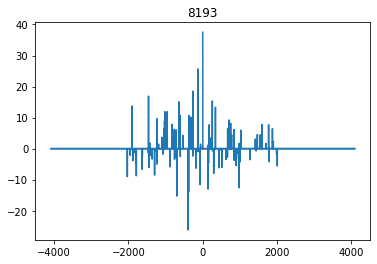

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

""" 
Returns a tuple (small,med,large).  Each element of the tuple
is a 1-dimensional numpy array containing the samples
[f(0/N),...,f((N-1)/N)] where N is the length of the corresponding array.
""" 
def load_data(): 
    small = np.loadtxt('data2049.txt').view(complex) 
    med = np.loadtxt('data4097.txt').view(complex) 
    large = np.loadtxt('data8193.txt').view(complex) 
    return small,med,large 
def main() : 
    s, m, l = load_data() 
    # Picture S: 
    c1 = np.fft.fft(s) 
    c1 = c1 / s.size 
    f1 = np.fft.fftfreq(2049, d = 1/2049) 
    plt.plot(f1, c1.real)  
    plt.title("2049")  
    # Picture M:  
    plt.figure() 
    c2 = np.fft.fft(m) 
    c2 = c2 / m.size 
    f2 = np.fft.fftfreq(4097, d = 1/4097) 
    plt.plot(f2, c2.real)  
    plt.title("4097")  
    # Picture L: 
    plt.figure()
    c3 = np.fft.fft(l) 
    c3 = c3 / l.size 
    f3 = np.fft.fftfreq(8193, d = 1/8193) 
    plt.plot(f3, c3.real) 
    plt.title("8193")

    ak = abs(c3.real)
    print(sorted(zip(ak,f3), reverse = True)[0:3])
    plt.show()

if __name__ == "__main__" : 
    main() 

## Problem 4 

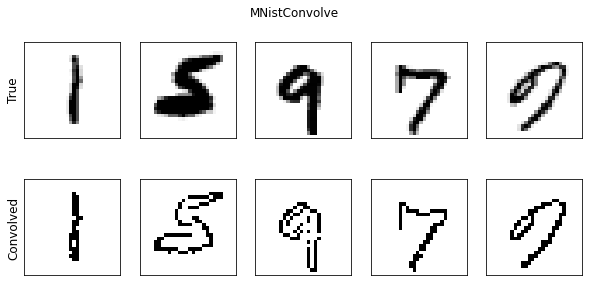

In [9]:
from mnist_tools import *
from plot_tools import *
import numpy as np
import scipy.ndimage 
from scipy.ndimage import convolve 
"""
Given an image img perform the following steps:
1) Convolve with the edge detection kernel
2) Let M denote the maximum value over all
values in the resulting convolved image.
3) Threshold the resulting convolution so that all values in the
image smaller than .25*M are set to 0, and all values larger than 
.25*M are set to 1.
4) Return the resulting thresholded convolved image.
"""
def edge_detect(img): 
    X = -1 / 8 * np.ones((3, 3)) 
    X[1, 1] = 1 
    ans = convolve(img, X) 
    M = np.amax(ans) 
    for i in range(0,28): 
        for j in range(0,28): 
            if (ans[i, j] < 0.25 * M): 
                ans[i, j] = 0 
            else: 
                ans[i,j] = 1 
    return ans  
    
def main() :
    test,testLabels = load_test_data("mnist_all.mat")
    imgs = []
    for im in test :
        img = im.reshape((28,28))
        imgs.extend([img,edge_detect(img)])
    plot_image_grid(imgs,"MNistConvolve",bycol=True,
                    row_titles=['True','Convolved'])

if __name__ == "__main__" :
    main()